# <span style="color:Red"> Gromacs tutorial using advanced tools </span>

In [1]:
### Install GROMACS
### ---------------
# !printf "y" | conda install -c bioconda gromacs

### Additional Libraries
### --------------------
# !printf "y" | conda install nglview mdanalysis
# !printf "y" | pip install GromacsWrapper pytraj

### Enable the previous libraries
### -----------------------------
!jupyter-nbextension enable --py --sys-prefix widgetsnbextension
!jupyter-nbextension enable nglview --py --sys-prefix

### Plotting
### --------
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Enable other libraries
### ----------------------
import pytraj as pt
import nglview as nv
import gromacs
import gromacs.formats

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling notebook extension nglview-js-widgets/extension...
      - Validating: OK


NOTE: Some configuration directories are not set up yet: 
	/Users/arnab/.gromacswrapper
	/Users/arnab/.gromacswrapper/qscripts
	/Users/arnab/.gromacswrapper/templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


In [2]:
!export GMXLIB=~/opt/anaconda3/envs/molecularDynamics/share/gromacs/top

In [20]:
# Rename the protein to prot.pdb
!cp 1aki.pdb prot.pdb
!rm prot_clean.pdb

In [42]:
# Remove trapped water molecules in the crystal structure
!grep -v HOH prot.pdb > prot_clean.pdb

## <span style="color:blue"> Generate Topology </span>

In [43]:
!printf "5" | gmx pdb2gmx -f prot_clean.pdb -o prot_pros.gro -water spce
#or !gmx pdb2gmx -f prot_clean.pdb -o prot_pros.gro -water spce -ff amber99sb

               :-) GROMACS - gmx pdb2gmx, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx pdb2gmx -f prot_clean.pdb -o prot_pros.gro -water spce

Select the Force Field:

From '/Users/arnab/opt/anaconda3/envs/molecularDynamics/share/gromacs/top':

 1: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)

 2: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)

 3: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)

 4: AMBER99 protein, nucleic AMBER94 (Wang et al., J. Comp. Chem. 21, 1049-1074, 2000)

 5: AMBER99SB protein, nucleic AMBER94 (Hornak et al., Proteins 65, 712-725, 2006)

 6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)

 7: AMBERGS force fie

In [44]:
!cat topol.top

;
;	File 'topol.top' was generated
;	By user: arnab (501)
;	On host: Arnabs-MacBook-Pro.local
;	At date: Sun Apr  2 18:10:50 2023
;
;	This is a standalone topology file
;
;	Created by:
;	              :-) GROMACS - gmx pdb2gmx, 2022.4-conda_forge (-:
;	
;	Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
;	Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
;	Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
;	Command line:
;	  gmx pdb2gmx -f prot_clean.pdb -o prot_pros.gro -water spce
;	Force field was read from the standard GROMACS share directory.
;

; Include forcefield parameters
#include "amber99sb.ff/forcefield.itp"

[ moleculetype ]
; Name            nrexcl
Protein_chain_A     3

[ atoms ]
;   nr       type  resnr residue  atom   cgnr     charge       mass  typeB    chargeB      massB
; residue   1 LYS rtp NLYS q +2.0
     1         N3      1    LYS      N      1     0.0966      14.01
     2          H      1    

  218   220   224     1 
  221   220   224     1 
  220   221   222     1 
  220   221   223     1 
  222   221   223     1 
  220   224   225     1 
  220   224   226     1 
  225   224   226     1 
  207   227   228     1 
  207   227   229     1 
  228   227   229     1 
  227   229   230     1 
  227   229   231     1 
  230   229   231     1 
  229   231   232     1 
  229   231   233     1 
  229   231   244     1 
  232   231   233     1 
  232   231   244     1 
  233   231   244     1 
  231   233   234     1 
  231   233   235     1 
  231   233   236     1 
  234   233   235     1 
  234   233   236     1 
  235   233   236     1 
  233   236   237     1 
  233   236   242     1 
  237   236   242     1 
  236   237   238     1 
  237   238   239     1 
  237   238   240     1 
  239   238   240     1 
  238   240   241     1 
  238   240   242     1 
  241   240   242     1 
  236   242   240     1 
  236   242   243     1 
  240   242   243     1 
  231   244   245     1 


In [45]:
!tail topol.top

; Include topology for ions
#include "amber99sb.ff/ions.itp"

[ system ]
; Name
LYSOZYME

[ molecules ]
; Compound        #mols
Protein_chain_A     1


## <span style="color:blue"> Generate Box and Solvate Protein </span>

In [46]:
!gmx editconf -f prot_pros.gro -o prot_box.gro -c -d 1.0 -bt cubic

               :-) GROMACS - gmx editconf, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx editconf -f prot_pros.gro -o prot_box.gro -c -d 1.0 -bt cubic

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 1960 atoms
Volume: 123.376 nm^3, corresponds to roughly 55500 electrons
No velocities found
    system size :  3.817  4.234  3.454 (nm)
    diameter    :  5.010               (nm)
    center      :  2.781  2.488  0.017 (nm)
    box vectors :  5.906  6.845  3.052 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  : 123.38               (nm^3)
    shift       :  0.724  1.017  3.488 (nm)
new center      :  3.505  3.505  3.505 (nm)
new box vectors :  7.010  7.010  7.010 (nm)
new box angles  :  90.00  90.00  90.00

In [47]:
!gmx solvate -cp prot_box.gro -cs spc216.gro -o prot_solv.gro -p topol.top
#                                or
# gromacs.solvate(cp="prot_box.gro", cs="spc216.gro", p="topol.top", o="prot_solv.gro")

               :-) GROMACS - gmx solvate, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx solvate -cp prot_box.gro -cs spc216.gro -o prot_solv.gro -p topol.top

Reading solute configuration
Reading solvent configuration

Initialising inter-atomic distances...

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the source belo

## <span style="color:blue"> Adding Ions </span>

In [48]:
# gromacs.grompp(f="ions.mdp", c="prot_solv.gro", p="topol.top", o="ions.tpr")
!gmx grompp -f ions.mdp -c prot_solv.gro -p topol.top -o ions.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx grompp -f ions.mdp -c prot_solv.gro -p topol.top -o ions.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ions.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -541208629

Generated 2145 of the 2145 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 2 bonded neighbours molecule type 'SOL'

NOTE 2 [file topol.top, line 18409]:
  System has non-zero total charge: 8.000000
  Total cha

In [49]:
!printf "SOL" | gmx genion -s ions.tpr -o prot_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

                :-) GROMACS - gmx genion, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx genion -s ions.tpr -o prot_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

Reading file ions.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file ions.tpr, VERSION 2022.4-conda_forge (single precision)
Will try to add 0 NA ions and 8 CL ions.
Select a continuous group of solvent molecules
Group     0 (         System) has 33892 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 ele

## <span style="color:blue"> Energy Minimization </span>

## <span style="color:blue"> Generate Box and Solvate Protein </span>

In [50]:
# gromacs.grompp(f="minim.mdp", c="prot_solv_ions.gro", p="topol.top", o="em.tpr")
!gmx grompp -f minim.mdp -c prot_solv_ions.gro -p topol.top -o em.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx grompp -f minim.mdp -c prot_solv_ions.gro -p topol.top -o em.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file minim.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -1946174497

Generated 2145 of the 2145 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'CL'
Analysing residue names:
There are:   

In [52]:
### Run the minimization
### --------------------
# gromacs.mdrun(v="yes", deffnm="em", nt="2")
!gmx mdrun -v -deffnm em -nt 6

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx mdrun -v -deffnm em -nt 6

Reading file em.tpr, VERSION 2022.4-conda_forge (single precision)
Using 1 MPI thread
Using 6 OpenMP threads 


Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =        50000
Step=    0, Dmax= 1.0e-02 nm, Epot= -3.29903e+05 Fmax= 1.54806e+05, atom= 19883
Step=    1, Dmax= 1.0e-02 nm, Epot= -3.49659e+05 Fmax= 6.16822e+04, atom= 19883
Step=    2, Dmax= 1.2e-02 nm, Epot= -3.73871e+05 Fmax= 2.44711e+04, atom= 19883
Step=    3, Dmax= 1.4e-02 nm, Epot= -4.02223e+05 Fmax= 1.02729e+04, atom= 24191
Step=    4, Dmax= 1.7e-02 nm, Epot= -4.29071e+05 Fmax= 4.80014e+03, atom= 983
Step=    5, Dmax= 2.1e-02 nm, Epot= -4.51910e+05 Fmax= 1.20669e+04,

Step=  122, Dmax= 2.9e-02 nm, Epot= -5.40998e+05 Fmax= 2.36669e+04, atom= 1015
Step=  124, Dmax= 1.7e-02 nm, Epot= -5.41670e+05 Fmax= 2.65558e+03, atom= 1015
Step=  125, Dmax= 2.1e-02 nm, Epot= -5.41921e+05 Fmax= 2.86574e+04, atom= 1015
Step=  126, Dmax= 2.5e-02 nm, Epot= -5.42757e+05 Fmax= 9.51944e+03, atom= 1015
Step=  128, Dmax= 1.5e-02 nm, Epot= -5.42878e+05 Fmax= 1.32197e+04, atom= 1015
Step=  129, Dmax= 1.8e-02 nm, Epot= -5.43029e+05 Fmax= 1.41429e+04, atom= 1015
Step=  130, Dmax= 2.1e-02 nm, Epot= -5.43083e+05 Fmax= 1.85492e+04, atom= 1015
Step=  131, Dmax= 2.6e-02 nm, Epot= -5.43177e+05 Fmax= 2.07135e+04, atom= 1015
Step=  133, Dmax= 1.5e-02 nm, Epot= -5.43670e+05 Fmax= 2.80592e+03, atom= 1015
Step=  134, Dmax= 1.8e-02 nm, Epot= -5.43872e+05 Fmax= 2.57419e+04, atom= 1015
Step=  135, Dmax= 2.2e-02 nm, Epot= -5.44529e+05 Fmax= 8.31325e+03, atom= 1015
Step=  137, Dmax= 1.3e-02 nm, Epot= -5.44648e+05 Fmax= 1.21129e+04, atom= 1015
Step=  138, Dmax= 1.6e-02 nm, Epot= -5.44798e+05 Fma

Step=  256, Dmax= 1.1e-02 nm, Epot= -5.59292e+05 Fmax= 1.65424e+03, atom= 1958
Step=  257, Dmax= 1.3e-02 nm, Epot= -5.59431e+05 Fmax= 1.80910e+04, atom= 1958
Step=  258, Dmax= 1.6e-02 nm, Epot= -5.59752e+05 Fmax= 6.27736e+03, atom= 1958
Step=  260, Dmax= 9.5e-03 nm, Epot= -5.59807e+05 Fmax= 8.21365e+03, atom= 1958
Step=  261, Dmax= 1.1e-02 nm, Epot= -5.59866e+05 Fmax= 9.34360e+03, atom= 1958
Step=  262, Dmax= 1.4e-02 nm, Epot= -5.59901e+05 Fmax= 1.15474e+04, atom= 1958
Step=  263, Dmax= 1.6e-02 nm, Epot= -5.59929e+05 Fmax= 1.36720e+04, atom= 1958
Step=  265, Dmax= 9.8e-03 nm, Epot= -5.60139e+05 Fmax= 1.39449e+03, atom= 1958
Step=  266, Dmax= 1.2e-02 nm, Epot= -5.60330e+05 Fmax= 1.71138e+04, atom= 1958
Step=  267, Dmax= 1.4e-02 nm, Epot= -5.60618e+05 Fmax= 4.65150e+03, atom= 1958
Step=  269, Dmax= 8.5e-03 nm, Epot= -5.60669e+05 Fmax= 8.49183e+03, atom= 1958
Step=  270, Dmax= 1.0e-02 nm, Epot= -5.60750e+05 Fmax= 7.11477e+03, atom= 1958
Step=  271, Dmax= 1.2e-02 nm, Epot= -5.60762e+05 Fma

Step=  388, Dmax= 1.7e-02 nm, Epot= -5.67918e+05 Fmax= 1.40628e+04, atom= 1958
Step=  390, Dmax= 1.0e-02 nm, Epot= -5.68061e+05 Fmax= 1.46799e+03, atom= 1958
Step=  391, Dmax= 1.2e-02 nm, Epot= -5.68178e+05 Fmax= 1.69394e+04, atom= 1958
Step=  392, Dmax= 1.5e-02 nm, Epot= -5.68360e+05 Fmax= 5.47130e+03, atom= 1958
Step=  394, Dmax= 8.7e-03 nm, Epot= -5.68395e+05 Fmax= 7.91952e+03, atom= 1958
Step=  395, Dmax= 1.0e-02 nm, Epot= -5.68437e+05 Fmax= 8.20411e+03, atom= 1958
Step=  396, Dmax= 1.3e-02 nm, Epot= -5.68456e+05 Fmax= 1.10802e+04, atom= 1958
Step=  397, Dmax= 1.5e-02 nm, Epot= -5.68488e+05 Fmax= 1.21013e+04, atom= 1958
Step=  399, Dmax= 9.0e-03 nm, Epot= -5.68598e+05 Fmax= 1.79034e+03, atom= 1958
Step=  400, Dmax= 1.1e-02 nm, Epot= -5.68673e+05 Fmax= 1.49892e+04, atom= 1958
Step=  401, Dmax= 1.3e-02 nm, Epot= -5.68817e+05 Fmax= 5.05109e+03, atom= 1958
Step=  403, Dmax= 7.8e-03 nm, Epot= -5.68855e+05 Fmax= 6.98688e+03, atom= 1958
Step=  404, Dmax= 9.4e-03 nm, Epot= -5.68896e+05 Fma

Step=  650, Dmax= 1.1e-02 nm, Epot= -5.78081e+05 Fmax= 4.22834e+03, atom= 1958
Step=  652, Dmax= 6.9e-03 nm, Epot= -5.78100e+05 Fmax= 6.41289e+03, atom= 1958
Step=  653, Dmax= 8.3e-03 nm, Epot= -5.78124e+05 Fmax= 6.29646e+03, atom= 1958
Step=  654, Dmax= 9.9e-03 nm, Epot= -5.78132e+05 Fmax= 9.00733e+03, atom= 1958
Step=  655, Dmax= 1.2e-02 nm, Epot= -5.78153e+05 Fmax= 9.29220e+03, atom= 1958
Step=  657, Dmax= 7.1e-03 nm, Epot= -5.78209e+05 Fmax= 1.71960e+03, atom= 1958
Step=  658, Dmax= 8.6e-03 nm, Epot= -5.78236e+05 Fmax= 1.13965e+04, atom= 1958
Step=  659, Dmax= 1.0e-02 nm, Epot= -5.78307e+05 Fmax= 4.47181e+03, atom= 1958
Step=  661, Dmax= 6.2e-03 nm, Epot= -5.78330e+05 Fmax= 5.00835e+03, atom= 1958
Step=  662, Dmax= 7.4e-03 nm, Epot= -5.78349e+05 Fmax= 6.42355e+03, atom= 1958
Step=  663, Dmax= 8.9e-03 nm, Epot= -5.78367e+05 Fmax= 7.23583e+03, atom= 1958
Step=  664, Dmax= 1.1e-02 nm, Epot= -5.78378e+05 Fmax= 9.20778e+03, atom= 1958
Step=  665, Dmax= 1.3e-02 nm, Epot= -5.78390e+05 Fma

Step=  781, Dmax= 1.5e-02 nm, Epot= -5.81152e+05 Fmax= 1.20523e+04, atom= 1958
Step=  783, Dmax= 8.8e-03 nm, Epot= -5.81235e+05 Fmax= 1.52273e+03, atom= 1958
Step=  785, Dmax= 5.3e-03 nm, Epot= -5.81264e+05 Fmax= 6.53293e+03, atom= 1958
Step=  786, Dmax= 6.3e-03 nm, Epot= -5.81294e+05 Fmax= 3.25813e+03, atom= 1958
Step=  787, Dmax= 7.6e-03 nm, Epot= -5.81297e+05 Fmax= 8.42155e+03, atom= 1958
Step=  788, Dmax= 9.1e-03 nm, Epot= -5.81332e+05 Fmax= 5.66542e+03, atom= 1958
Step=  790, Dmax= 5.5e-03 nm, Epot= -5.81358e+05 Fmax= 2.75472e+03, atom= 1958
Step=  791, Dmax= 6.6e-03 nm, Epot= -5.81368e+05 Fmax= 7.41480e+03, atom= 1958
Step=  792, Dmax= 7.9e-03 nm, Epot= -5.81399e+05 Fmax= 4.71663e+03, atom= 1958
Step=  794, Dmax= 4.7e-03 nm, Epot= -5.81422e+05 Fmax= 2.59334e+03, atom= 1958
Step=  795, Dmax= 5.7e-03 nm, Epot= -5.81437e+05 Fmax= 6.11734e+03, atom= 1958
Step=  796, Dmax= 6.8e-03 nm, Epot= -5.81461e+05 Fmax= 4.40513e+03, atom= 1958
Step=  797, Dmax= 8.2e-03 nm, Epot= -5.81463e+05 Fma

Step=  915, Dmax= 5.6e-03 nm, Epot= -5.83534e+05 Fmax= 5.00538e+03, atom= 1958
Step=  916, Dmax= 6.8e-03 nm, Epot= -5.83547e+05 Fmax= 5.37369e+03, atom= 1958
Step=  917, Dmax= 8.1e-03 nm, Epot= -5.83554e+05 Fmax= 7.14301e+03, atom= 1958
Step=  918, Dmax= 9.7e-03 nm, Epot= -5.83565e+05 Fmax= 7.80836e+03, atom= 1958
Step=  920, Dmax= 5.8e-03 nm, Epot= -5.83604e+05 Fmax= 1.19829e+03, atom= 1958
Step=  921, Dmax= 7.0e-03 nm, Epot= -5.83629e+05 Fmax= 9.46796e+03, atom= 1958
Step=  922, Dmax= 8.4e-03 nm, Epot= -5.83678e+05 Fmax= 3.50736e+03, atom= 1958
Step=  924, Dmax= 5.1e-03 nm, Epot= -5.83692e+05 Fmax= 4.23234e+03, atom= 1958
Step=  925, Dmax= 6.1e-03 nm, Epot= -5.83705e+05 Fmax= 5.11931e+03, atom= 1958
Step=  926, Dmax= 7.3e-03 nm, Epot= -5.83716e+05 Fmax= 6.03686e+03, atom= 1958
Step=  927, Dmax= 8.7e-03 nm, Epot= -5.83724e+05 Fmax= 7.41336e+03, atom= 1958
Step=  928, Dmax= 1.0e-02 nm, Epot= -5.83730e+05 Fmax= 8.65614e+03, atom= 1958
Step=  930, Dmax= 6.3e-03 nm, Epot= -5.83775e+05 Fma

In [54]:
!printf "10 0" | gmx energy -f em.edr -o potential.xvg

                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx energy -f em.edr -o potential.xvg

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Pressure        12  Vir-XX        
 13  Vir-XY          14  Vir-XZ          15  Vir-YX          16  Vir-YY        
 17  Vir-YZ          18  Vir-ZX          19  Vir-ZY     

In [55]:
# Read XMgrace XVG files in python
potential = np.genfromtxt([i for i in open('potential.xvg').read().splitlines() if not i.startswith(('#','@'))])

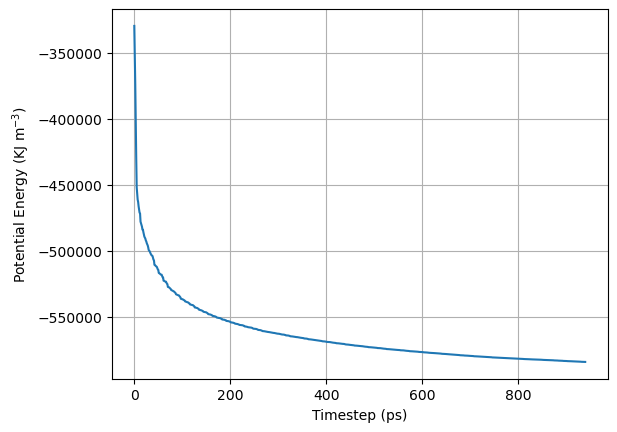

In [61]:
plt.plot(*potential.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('Potential Energy (KJ m$^{-3}$)')
plt.grid()
plt.show()

## <span style="color:blue"> Equilibration Steps - NVT </span>

In [72]:
# gromacs.grompp(f="nvt.mdp", c="em.gro", r="em.gro", p="topol.top", o="nvt.tpr")
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -67156513

Generated 2145 of the 2145 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning all bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning all bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning all bonds into constraints...

NOTE 1 [file unknown]:
  You are using constraints on all bonds, whereas the fo

In [73]:
# gromacs.mdrun(v=True, deffnm="nvt", nt="6")
!gmx mdrun -v -deffnm nvt -nt 6

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx mdrun -v -deffnm nvt -nt 6


Back Off! I just backed up nvt.log to ./#nvt.log.2#
Reading file nvt.tpr, VERSION 2022.4-conda_forge (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.115

Using 1 MPI thread
Using 6 OpenMP threads 


Back Off! I just backed up nvt.trr to ./#nvt.trr.2#

Back Off! I just backed up nvt.edr to ./#nvt.edr.2#
starting mdrun 'LYSOZYME in water'
5000 steps,     10.0 ps.
step 4900, remaining wall clock time:     0 s          
Writing final coordinates.
step 5000, remaining wall clock time:     0 s          
               Core t (s)   Wall t (s)        (%)
       Time:      222.776       37.132      600.0
                 (ns/day)    (hour/ns)
Perfo

In [70]:
### if interrupted, use this for restart
# !gmx mdrun -v -deffnm nvt -cpi nvt.cpt -nt 6
# gromacs.mdrun(v="yes", deffnm="nvt", cpi="nvt.cpt", nt="6")

In [74]:
!printf "15 0" | gmx energy -f nvt.edr -o temperature.xvg

                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx energy -f nvt.edr -o temperature.xvg

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Angle            2  Proper-Dih.      3  Per.-Imp.-Dih.   4  LJ-14         
  5  Coulomb-14       6  LJ-(SR)          7  Disper.-corr.    8  Coulomb-(SR)  
  9  Coul.-recip.    10  Position-Rest.  11  Potential       12  Kinetic-En.   
 13  Total-Energy    14  Conserved-En.   15  Temperature     16  Pres.-DC      
 17  Pressure        18  Constr.-rmsd    19  Vir-XX 

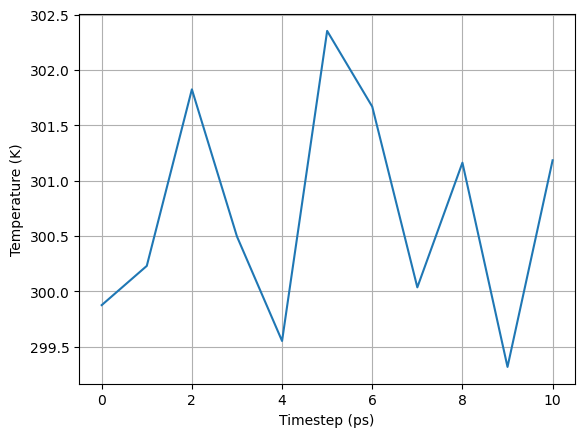

In [75]:
temperature = np.genfromtxt([i for i in open('temperature.xvg').read().splitlines() if not i.startswith(('#','@'))])
plt.plot(*temperature.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('Temperature (K)')
plt.grid()
plt.show()

## <span style="color:blue"> Equilibration Steps - NPT </span>

In [82]:
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr
## or gromacs.grompp(f="npt.mdp", c="nvt.gro", r="nvt.gro", p="topol.top", o="npt.tpr")
# !gmx mdrun -v -deffnm npt -nt 8

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 1028381423

Generated 2145 of the 2145 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

NOTE 1 [file topol.top, line 18410]:
  You are combining position restr

In [83]:
!gmx mdrun -v -deffnm npt -nt 6

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx mdrun -v -deffnm npt -nt 6

Reading file npt.tpr, VERSION 2022.4-conda_forge (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.115

Using 1 MPI thread
Using 6 OpenMP threads 

starting mdrun 'LYSOZYME in water'
5000 steps,     10.0 ps.
step 4900, remaining wall clock time:     0 s          
Writing final coordinates.
step 5000, remaining wall clock time:     0 s          
               Core t (s)   Wall t (s)        (%)
       Time:      231.990       38.666      600.0
                 (ns/day)    (hour/ns)
Performance:       22.350        1.074

GROMACS reminds you: "The easiest way to scale well is to have bad single-core performance" (Blind Freddie)



                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx energy -f npt.edr -o pressure.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rm

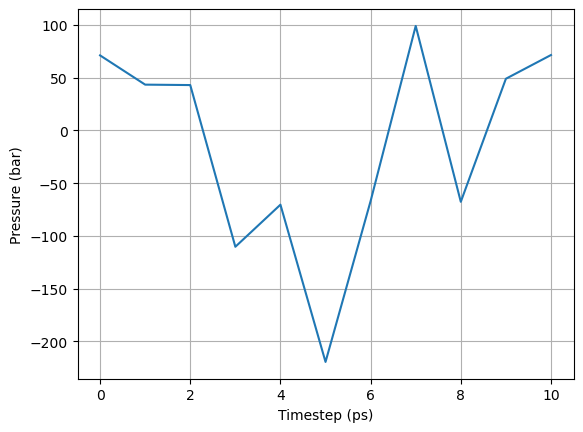

In [89]:
### Extract pressure and plot
### ------------------------
!printf "18 0" | gmx energy -f npt.edr -o pressure.xvg
pressure = np.genfromtxt([i for i in open('pressure.xvg').read().splitlines() if not i.startswith(('#','@'))])
plt.plot(*pressure.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('Pressure (bar)')
plt.grid()
plt.show()

                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx energy -f npt.edr -o density.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rms

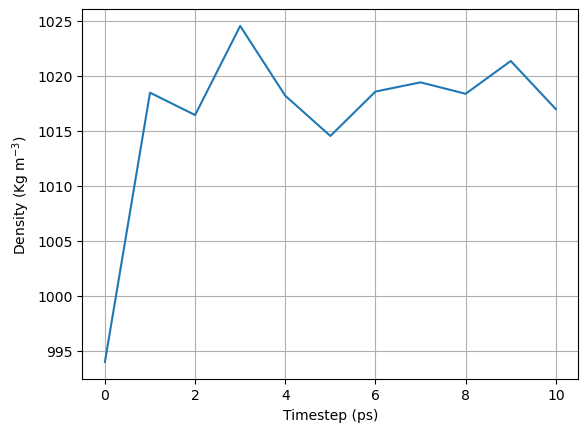

In [90]:
### Extract density and plot
### ------------------------
!printf "24 0" | gmx energy -f npt.edr -o density.xvg
density = np.genfromtxt([i for i in open('density.xvg').read().splitlines() if not i.startswith(('#','@'))])
plt.plot(*density.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('Density (Kg m$^{-3}$)')
plt.grid()
plt.show()

In [93]:
# %qtconsole
# !vmd nvt.gro

## <span style="color:blue"> Equilibrium Molecular Dynamics - Production MD run </span>

In [95]:
!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md01.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md01.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 1604907887

Generated 2145 of the 2145 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...
Analysing residue names:
There are:   129    Protein residues
There are: 10636     

In [96]:
!gmx mdrun -v -deffnm md01 -nt 8

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx mdrun -v -deffnm md01 -nt 8

Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.116

Using 1 MPI thread
Using 8 OpenMP threads 

starting mdrun 'LYSOZYME in water'
5000 steps,     10.0 ps.
step 4900, remaining wall clock time:     0 s          
Writing final coordinates.
step 5000, remaining wall clock time:     0 s          
               Core t (s)   Wall t (s)        (%)
       Time:      253.803       31.726      800.0
                 (ns/day)    (hour/ns)
Performance:       27.239        0.881

GROMACS reminds you: "Can someone please tell Icarus that he's not the only one falling from the sky?" (Urban Dance Squad)

## <span style="color:blue"> Trajectory VIsualization </span>

In [97]:
!printf "Protein\nSystem\n" | gmx trjconv -s md01.tpr -f md01.xtc -center -ur compact -pbc mol -o md01_center.xtc

               :-) GROMACS - gmx trjconv, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx trjconv -s md01.tpr -f md01.xtc -center -ur compact -pbc mol -o md01_center.xtc

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for centering
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 element

In [98]:
!printf "Backbone\nSystem\n" | gmx trjconv -s md01.tpr -f md01_center.xtc -fit rot+trans -o md01_fit.xtc

               :-) GROMACS - gmx trjconv, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx trjconv -s md01.tpr -f md01_center.xtc -fit rot+trans -o md01_fit.xtc

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for least squares fit
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements


In [106]:
### To visualize trajectories
#vmd npt.gro md01_fit.xtc

In [3]:
### Use nglview to visualize
traj1 = pt.load(nv.datafiles.XTC, nv.datafiles.PDB)
# traj1 = pt.load(md01_fit.xtc, prot_sold_ions.pdb)
view1 = nv.show_pytraj(traj1)
# view2.background='white'
view1

NGLWidget(max_frame=50)

In [6]:
traj2 = pt.datafiles.load_tz2()
c = view1.add_trajectory(traj2)
view2 = nv.show_pytraj(traj2)
view2

NGLWidget(max_frame=100)

## <span style="color:blue"> Analysis </span>

In [10]:
### Calculate root mean square deviation from a reference structure
### ---------------------------------------------------------------
!printf "Backbone\nSystem\n" | gmx rms -s md01.tpr -f md01_fit.xtc -o rmsd.xvg -tu ps

                 :-) GROMACS - gmx rms, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx rms -s md01.tpr -f md01_fit.xtc -o rmsd.xvg -tu ps

Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for least squares fit
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    SideChain-H) ha

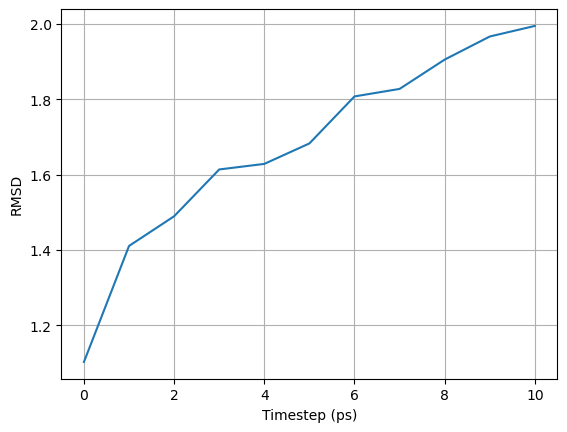

In [11]:
rmsd = np.genfromtxt([i for i in open('rmsd.xvg').read().splitlines() if not i.startswith(('#','@'))])
plt.plot(*rmsd.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('RMSD')
plt.grid()
plt.show()

In [12]:
!printf "Backbone\nSystem\n" | gmx rms -s em.tpr -f md01_fit.xtc -o rmsd_ztal.xvg -tu ps

                 :-) GROMACS - gmx rms, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx rms -s em.tpr -f md01_fit.xtc -o rmsd_ztal.xvg -tu ps

Reading file em.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file em.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for least squares fit
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    SideChain-H) has

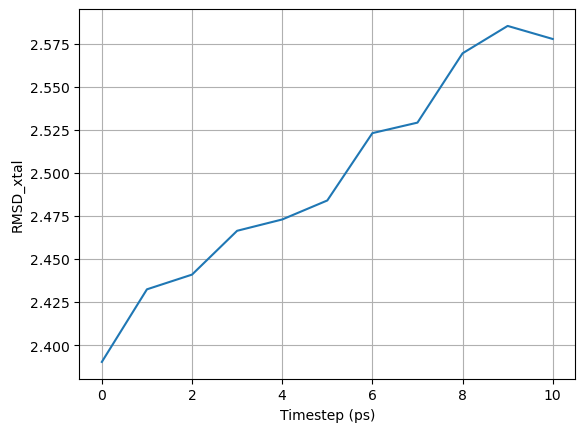

In [14]:
### Without PBC
### -----------
rmsd_xtal = np.genfromtxt([i for i in open('rmsd_ztal.xvg').read().splitlines() if not i.startswith(('#','@'))])
plt.plot(*rmsd_xtal.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('RMSD_xtal')
plt.grid()
plt.show()

In [15]:
### Radius of gyration
### ------------------
!printf "Protein\nSystem\n" | gmx gyrate -s md01.tpr -f md01_fit.xtc -o gyrate.xvg

                :-) GROMACS - gmx gyrate, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx gyrate -s md01.tpr -f md01_fit.xtc -o gyrate.xvg

Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    SideChain-H) has   484 elements
Group    10 (    P

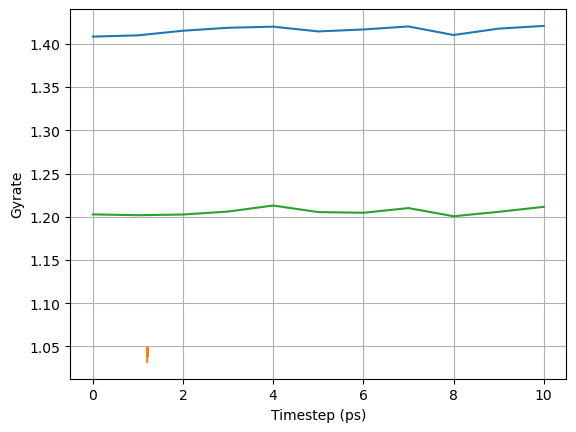

In [16]:
gyrate = np.genfromtxt([i for i in open('gyrate.xvg').read().splitlines() if not i.startswith(('#','@'))])
plt.plot(*gyrate.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('Gyrate')
plt.grid()
plt.show()

In [17]:
!printf "keep 1\na CA\nname 1 Calpha\nq\n" | gmx make_ndx -f md01.tpr -o ca.ndx

               :-) GROMACS - gmx make_ndx, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx make_ndx -f md01.tpr -o ca.ndx


Reading structure file
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Going to read 0 old index file(s)
Analysing residue names:
There are:   129    Protein residues
There are: 10636      Water residues
There are:     8        Ion residues
Analysing Protein...

  0 System              : 33876 atoms
  1 Protein             :  1960 atoms
  2 Protein-H           :  1001 atoms
  3 C-alpha             :   129 atoms
  4 Backbone            :   387 atoms
  5 MainChain           :   517 atoms
  6 MainChain+Cb        :   634 atoms
  7 MainChain+H         :   646 atoms
  8 S

In [18]:
!printf "Calpha\nCalpha\n" | gmx rms -s md01.tpr -f md01.xtc -n ca.ndx -o rmsdca.xvg -fit rot+trans

                 :-) GROMACS - gmx rms, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx rms -s md01.tpr -f md01.xtc -n ca.ndx -o rmsdca.xvg -fit rot+trans

Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for least squares fit
Group     0 (        Protein) has  1960 elements
Group     1 (         Calpha) has   129 elements
Select a group: Selected 1: 'Calpha'
Select group for RMSD calculation
Group     0 (        Protein) has  1960 elements
Group     1 (         Calpha) has   129 elements
Select a group: Selected 1: 'Calpha'
Last frame         10 time   10.000   

GROMACS reminds you: "Measuring programming progress by lines of code is like measuring aircraft building progres

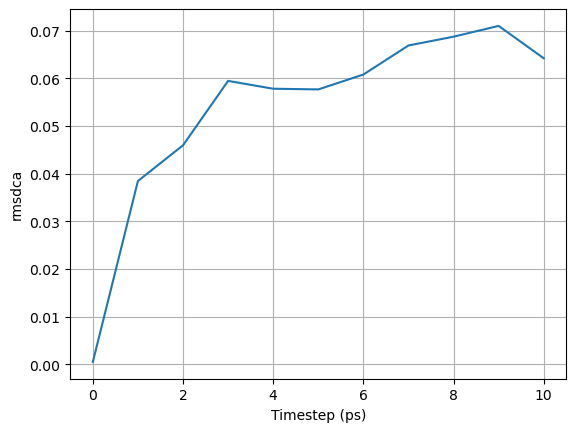

In [20]:
rmsdca = np.genfromtxt([i for i in open('rmsdca.xvg').read().splitlines() if not i.startswith(('#','@'))])
plt.plot(*rmsdca.T)
plt.xlabel('Timestep (ps)')
plt.ylabel('rmsdca')
plt.grid()
plt.show()

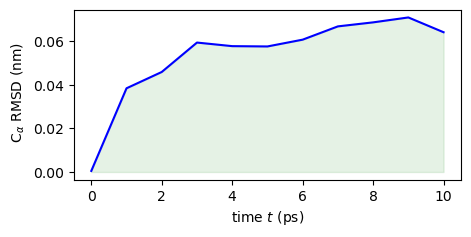

In [23]:
## Better Plotting
rmsdca = np.genfromtxt([i for i in open('rmsdca.xvg').read().splitlines() if not i.startswith(('#','@'))])
# rmsdca
t = rmsdca[:,0]
rmsd = rmsdca[:,1]

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(t,rmsd, color="green", linestyle="-", alpha=0.1)
ax.plot(t,rmsd, color="blue", linestyle="-")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r" C$_\alpha$ RMSD (nm)")

fig.savefig("rmsd_ca.png", dpi=300)
# fig.savefig("rmsd_ca.svg")
# fig.savefig("rmsd_ca.pdf")

In [24]:
!printf "Calpha\n" | gmx rmsf -s md01.tpr -f md01.xtc -n ca.ndx -o rmsf.xvg -fit -xvg none

                 :-) GROMACS - gmx rmsf, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx rmsf -s md01.tpr -f md01.xtc -n ca.ndx -o rmsf.xvg -fit -xvg none

Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Select group(s) for root mean square calculation
Group     0 (        Protein) has  1960 elements
Group     1 (         Calpha) has   129 elements
Select a group: Selected 1: 'Calpha'
Last frame         10 time   10.000   

GROMACS reminds you: "Religion is a culture of faith; science is a culture of doubt." (Richard Feynman)



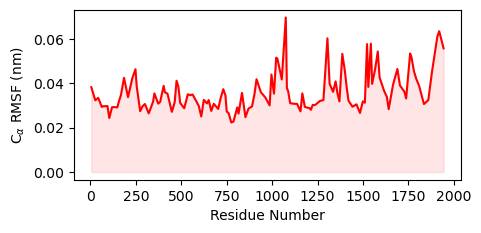

In [27]:
## Better Plotting
rmsf = np.genfromtxt([i for i in open('rmsf.xvg').read().splitlines() if not i.startswith(('#','@'))])
# rmsdca
t = rmsf[:,0]
rmsf = rmsf[:,1]

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(t,rmsf, color="red", linestyle="-", alpha=0.1)
ax.plot(t,rmsf, color="red", linestyle="-")

ax.set_xlabel("Residue Number")
ax.set_ylabel(r"C$_\alpha $ RMSF (nm)")

fig.savefig("rmsf_ca.png", dpi=300)
# fig.savefig("rmsd_ca.svg")
# fig.savefig("rmsd_ca.pdf")

In [46]:
!printf "keep 0\ndel 0A\nr 52 & a CA\nname 0 I52\nr 145 & a CA\nname 1 K145\nq\n" | gmx make_ndx -f md01.tpr -o I52K145.ndx

               :-) GROMACS - gmx make_ndx, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx make_ndx -f md01.tpr -o I52K145.ndx


Reading structure file
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Going to read 0 old index file(s)
Analysing residue names:
There are:   129    Protein residues
There are: 10636      Water residues
There are:     8        Ion residues
Analysing Protein...

  0 System              : 33876 atoms
  1 Protein             :  1960 atoms
  2 Protein-H           :  1001 atoms
  3 C-alpha             :   129 atoms
  4 Backbone            :   387 atoms
  5 MainChain           :   517 atoms
  6 MainChain+Cb        :   634 atoms
  7 MainChain+H         :   646 atoms


In [47]:
!printf "0\n1\n" | gmx distance -f md01_fit.xtc -s md01.tpr -n I52K145.ndx -oall dist.xvg -xvg none

               :-) GROMACS - gmx distance, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/tutorial2
Command line:
  gmx distance -f md01_fit.xtc -s md01.tpr -n I52K145.ndx -oall dist.xvg -xvg none

Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md01.tpr, VERSION 2022.4-conda_forge (single precision)

-------------------------------------------------------
Program:     gmx distance, version 2022.4-conda_forge
Source file: src/gromacs/trajectoryanalysis/modules/distance.cpp (line 217)
Function:    void gmx::analysismodules::(anonymous namespace)::checkSelections(const gmx::SelectionList &)

Inconsistency in user input:
Selection 'K145' does not evaluate into an even number of positions (there are
1 positions)

For more information and tips for troubleshooting, please chec

In [ ]:
### Gyration
t,data,x,y,z = numpy.loadtxt("gyrate.xvg", unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(t,data, color="magenta", linestyle="-", alpha=0.1)
ax.plot(t,data, color="magenta", linestyle="-")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"protein $R_\mathrm{gyr}$ (nm)")

fig.savefig("rgyr.png", dpi=300)
fig.savefig("rgyr.svg")
fig.savefig("rgyr.pdf")

In [67]:
## <span style="color:blue"> Generate Box and Solvate Protein </span>

In [ ]:
## <span style="color:blue"> Generate Box and Solvate Protein </span>